# Mall Customer Segmentation Analysis (Full)

This Jupyter notebook encapsulates the analysis performed on the 'Mall_Customers' dataset, including data cleaning, exploratory analysis, customer segmentation using K-Means clustering (with and without data standardization), and targeted marketing campaign suggestions for each customer segment.

## Dataset Overview
Data set pulled from Kaggle https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/ <br><br>
The dataset includes the following columns:
- CustomerID: Unique identifier for each customer.
- Gender: Gender of the customer (Male/Female).
- Age: Age of the customer.
- Annual Income (k$): Annual Income of the customer in thousands of dollars.
- Spending Score (1-100): A score assigned to the customer based on their spending behavior.

## Analysis Steps

1. Data Loading and Cleaning
2. Exploratory Data Analysis
3. Clustering using K-Means (with and without Standardized Data)
4. Analysis of Clusters
5. Targeted Campaign Suggestions for Each Cluster


## Data Loading and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data (Update the file path as necessary)
file_path = 'files/Mall_Customers.xlsx' 
data_xlsx = pd.read_excel(file_path)

# Display the first few rows
data_xlsx.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Checking for missing values and data types
missing_values = data_xlsx.isnull().sum()
data_types = data_xlsx.dtypes

# Checking for duplicate entries
duplicate_entries = data_xlsx.duplicated().sum()

#missing_values, data_types, duplicate_entries
print(f'''Mising Values:\n{missing_values}\n{'-'*30}
Duplicates:\n{duplicate_entries}\n{'-'*30}
Data Types:\n{data_types}''')

Mising Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
------------------------------
Duplicates:
0
------------------------------
Data Types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


## Exploratory Data Analysis

In [4]:
# Summary statistics for numeric columns
numeric_summary = data_xlsx.describe()

In [5]:
# Unique values in the 'Gender' column
gender_unique_values = data_xlsx['Gender'].unique()

numeric_summary, gender_unique_values

(       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000,
 array(['Male', 'Female'], dtype=object))

- From this analysis, the dataset appears to be clean and well-formatted. There are no apparent anomalies or inconsistencies.

## Clustering using K-Means (without Standardized Data)

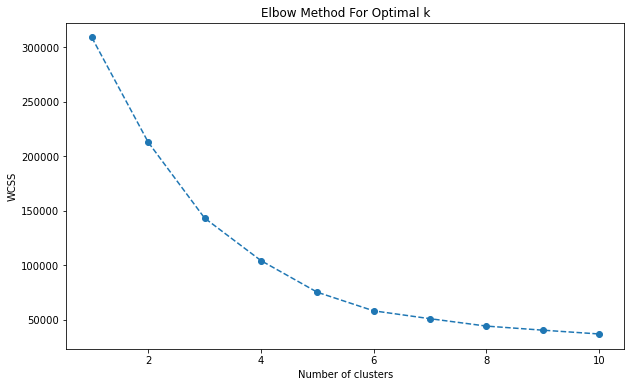

In [6]:
# Selecting the relevant features for clustering
features = data_xlsx[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Using the Elbow Method to find the optimal number of clusters
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

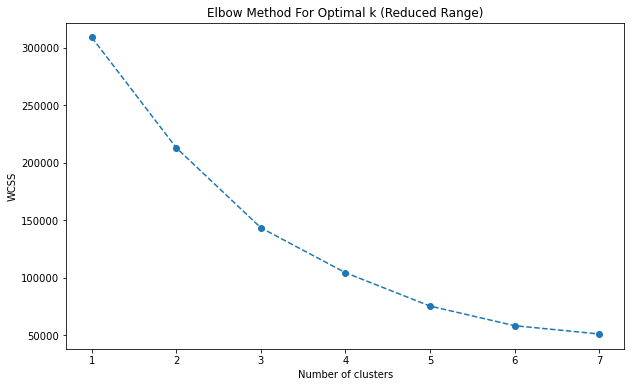

In [7]:
# Reducing the range for the number of clusters to 1-7
wcss_reduced_range = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss_reduced_range.append(kmeans.inertia_)

# Plotting the results of the Elbow Method with reduced range
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss_reduced_range, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k (Reduced Range)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Performing K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)

# Adding the cluster information to the original dataframe
data_clustered = data_xlsx.copy()
data_clustered['Cluster'] = clusters

# Displaying the first few rows of the dataframe with cluster information
data_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


## Analysis of Clusters (without Standardized Data)

In [9]:
data_clustered['Cluster'].value_counts().sort_index()

0    28
1    39
2    38
3    95
Name: Cluster, dtype: int64

In [10]:
# Calculating mean values for each cluster
cluster_means = data_clustered.groupby('Cluster').mean()
cluster_means

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,28.642857,24.821429,28.714286,74.250000
1,162.000000,32.692308,86.538462,82.128205
2,162.000000,40.394737,87.000000,18.631579
3,71.831579,44.894737,48.705263,42.631579


    Cluster 0:
        Average Age: ~25 years
        Average Annual Income: ~$29,000
        Average Spending Score: ~74
        Characteristics: Lower income, high spending score, younger age group.

    Cluster 1:
        Average Age: ~33 years
        Average Annual Income: ~$87,000
        Average Spending Score: ~82
        Characteristics: Higher income, high spending score, younger than Cluster 0 but older than Cluster 2.
        
     Cluster 2:
        Average Age: ~40 years
        Average Annual Income: ~$87,000
        Average Spending Score: ~19
        Characteristics: Higher income, lower spending score, middle-aged.

    Cluster 3:
        Average Age: ~45 years
        Average Annual Income: ~$49,000
        Average Spending Score: ~43
        Characteristics: Moderate income and spending score, older age group.

## Clustering using K-Means (Standardized Data)

<b>Why Standardize?</b> <br>
Standardizing the data is generally recommended when using K-Means clustering. K-Means clustering is a distance-based algorithm (it uses Euclidean distance to assess similarity), and thus it is sensitive to the scales of the data. Features on larger scales can disproportionately influence the result, leading to potentially misleading clusters.

Standardizing the data (such as using z-score normalization) ensures that each feature contributes equally to the distance calculations. This process transforms the data so that each feature has a mean of 0 and a standard deviation of 1.

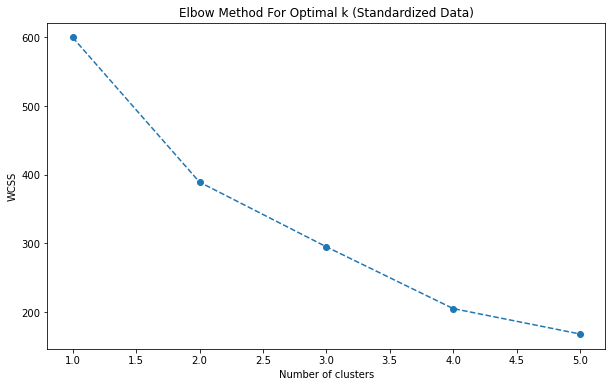

In [11]:
# Selecting the features to be standardized
features_to_standardize = data_xlsx[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_standardize)

# Using the Elbow Method to find the optimal number of clusters on standardized data
wcss_standardized = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss_standardized.append(kmeans.inertia_)

# Plotting the results of the Elbow Method with standardized data
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss_standardized, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k (Standardized Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Performing K-Means clustering with 4 clusters on standardized data
kmeans_standardized = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters_standardized = kmeans_standardized.fit_predict(scaled_features)

# Adding the cluster information to the original dataframe
data_clustered_standardized = data_xlsx.copy()
data_clustered_standardized['Cluster'] = clusters_standardized

# Calculating mean values for each cluster in the standardized data
cluster_means_standardized = data_clustered_standardized.groupby('Cluster').mean()

cluster_means_standardized

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,160.552632,39.368421,86.500000,19.578947
1,53.438596,25.438596,40.000000,60.298246
2,161.025000,32.875000,86.100000,81.525000
3,69.415385,53.984615,47.707692,39.969231


In [13]:
data_clustered_standardized['Cluster'].value_counts().sort_index()

0    38
1    57
2    40
3    65
Name: Cluster, dtype: int64

## Analysis of Clusters (Standardized Data)

    Cluster 0:
        Average Age: ~39 years
        Average Annual Income: ~$86,500
        Average Spending Score: ~20
        Characteristics: Middle-aged with high income and low spending score.
    
    Cluster 1:
        Average Age: ~25 years
        Average Annual Income: ~$40,000
        Average Spending Score: ~60
        Characteristics: Young adults with moderate income and moderate spending score.
    
    Cluster 2:
        Average Age: ~33 years
        Average Annual Income: ~$86,100
        Average Spending Score: ~82
        Characteristics: Younger adults with high income and high spending score.

    Cluster 3:
        Average Age: ~54 years
        Average Annual Income: ~$47,700
        Average Spending Score: ~40
        Characteristics: Older adults with moderate income and moderate spending score.

## Targeted Campaign Suggestions for Each Cluster

### Cluster 0: Middle-aged, High Income, Low Spending

    Campaign Idea: "Exclusive Quality"
        Focus: High-quality, durable products with an emphasis on value and long-term investment.
        Promotion Strategy: Use direct mail or email newsletters highlighting durability, craftsmanship, 
        and the cost-effectiveness of products over time.
        Events: Host in-store demonstrations or webinars on product care or investment pieces for the home.

### Cluster 1: Young Adults, Moderate Income, Moderate Spending

    Campaign Idea: "Smart Savvy Shoppers"
        Focus: Trendy yet affordable products, bundled offers, and limited-time deals.
        Promotion Strategy: Use social media and email campaigns that emphasize style, affordability, 
        and the "smart buy."
        Events: Flash sales or pop-up events, collaborations with popular but affordable brands.

### Cluster 2: Younger Adults, High Income, High Spending

    Campaign Idea: "Trendsetters' Club"
        Focus: Latest trends, premium brands, and luxury experiences.
        Promotion Strategy: Leverage social media influencers and create Instagram-worthy in-store experiences 
        or exclusive online content.
        Events: Invite-only events or early access to new product releases, possibly integrating augmented 
        reality (AR) experiences.

### Cluster 3: Older Adults, Moderate Income, Moderate Spending

    Campaign Idea: "Classic Value"
        Focus: Quality, classic items with a focus on comfort, practicality, and ease of use.
        Promotion Strategy: Traditional marketing channels like print ads, along with Facebook and email campaigns.
        Emphasize customer testimonials and practical benefits.
        Events: Workshops or seminars that align with lifestyle interests, like gardening, cooking, 
        or home organization.